In [87]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as plt

In [88]:
get_ipython().system('pip install sklearn')

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)'))) - skipping


In [89]:
train = pd.read_excel("C:\\Users\\PS\\Dropbox\\PC\\Downloads\\2018.xlsx")
train.head()

,Column1,Column6,Column8,Column9,Column10,Column11,Column13,Column14,Column18,Column21,Column23,RESULT
0,693,0,P,80,41,132000,3.250,R,SF,P,2,1
1,812,0,P,14,14,35000,3.750,R,SF,P,2,1
2,650,0,P,36,39,340000,4.000,R,SF,C,2,1
3,705,30,P,95,9,279000,3.875,R,PU,P,2,1
4,766,0,P,80,42,344000,4.125,R,SF,N,1,1


In [90]:
print(train.isnull().sum())


Column1     0
Column6     0
Column8     0
Column9     0
Column10    0
Column11    0
Column13    0
Column14    0
Column18    0
Column21    0
Column23    0
RESULT      0
dtype: int64


In [91]:
train.shape

(19909, 12)

In [6]:
train.head()

,Column1,Column6,Column8,Column9,Column10,Column11,Column13,Column14,Column18,Column21,Column23,RESULT
0,693,0,P,80,41,132000,3.250,R,SF,P,2,1
1,812,0,P,14,14,35000,3.750,R,SF,P,2,1
2,650,0,P,36,39,340000,4.000,R,SF,C,2,1
3,705,30,P,95,9,279000,3.875,R,PU,P,2,1
4,766,0,P,80,42,344000,4.125,R,SF,N,1,1


In [7]:
print(train.isnull().sum())

Column1     0
Column6     0
Column8     0
Column9     0
Column10    0
Column11    0
Column13    0
Column14    0
Column18    0
Column21    0
Column23    0
RESULT      0
dtype: int64


In [8]:
#label encoding
train.replace({'LOANSTATUS':{'no':0, 'yes':1}},inplace=True)

In [9]:
train.replace({'Column8':{'I':0,'P':1,'S':2}},inplace=True)
train.replace({'Column14':{'B':0,'C':1,'R':2}},inplace=True)
train.replace({'Column18':{'CO':0,'CP':1,'MH':2,'PU':3,'SF':4}},inplace=True)
train.replace({'Column21':{'C':0,'N':1,'P':2}},inplace=True)

In [10]:
train.head()

,Column1,Column6,Column8,Column9,Column10,Column11,Column13,Column14,Column18,Column21,Column23,RESULT
0,693,0,1,80,41,132000,3.250,2,4,2,2,1
1,812,0,1,14,14,35000,3.750,2,4,2,2,1
2,650,0,1,36,39,340000,4.000,2,4,0,2,1
3,705,30,1,95,9,279000,3.875,2,3,2,2,1
4,766,0,1,80,42,344000,4.125,2,4,1,1,1


In [11]:
train.describe()


,Column1,Column6,Column8,Column9,Column10,Column11,Column13,Column14,Column18,Column21,Column23,RESULT
count,19909.000000,19909.000000,19909.000000,19909.000000,19909.000000,19909.000000,19909.000000,19909.000000,19909.000000,19909.000000,19909.000000,19909.000000
mean,754.426189,6.238334,0.995429,71.675624,35.741323,262273.444171,4.527237,1.566980,3.203476,1.408207,1.446934,0.499473
std,42.885513,11.154139,0.337867,18.824386,9.673725,122972.324343,0.621703,0.631531,1.216447,0.814140,0.515540,0.500012
min,601.000000,0.000000,0.000000,4.000000,3.000000,19000.000000,2.500000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,726.000000,0.000000,1.000000,60.000000,29.000000,164000.000000,4.000000,1.000000,3.000000,1.000000,1.000000,0.000000
50%,763.000000,0.000000,1.000000,76.000000,37.000000,249000.000000,4.500000,2.000000,4.000000,2.000000,1.000000,0.000000
75%,789.000000,12.000000,1.000000,85.000000,44.000000,350000.000000,4.990000,2.000000,4.000000,2.000000,2.000000,1.000000
max,827.000000,35.000000,2.000000,105.000000,50.000000,965000.000000,6.750000,2.000000,4.000000,2.000000,4.000000,1.000000


<AxesSubplot:>

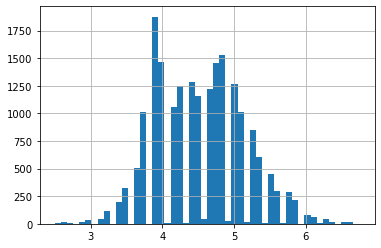

In [94]:
#distribution analysis
train['Column13'].hist(bins=50)

<AxesSubplot:>

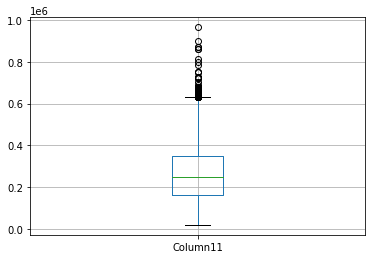

In [97]:
train.boxplot(column='Column11')

<AxesSubplot:title={'center':'Column11'}, xlabel='Column13'>

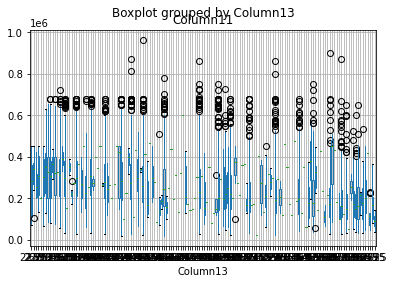

In [99]:
train.boxplot(column='Column11', by = 'Column13')

In [15]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Column1','Column6','Column8','Column9','Column10','Column11','Column13','Column14','Column18','Column21','Column23']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
train.dtypes

Column1     int64
Column6     int64
Column8     int64
Column9     int64
Column10    int64
Column11    int64
Column13    int64
Column14    int64
Column18    int64
Column21    int64
Column23    int64
RESULT      int64
dtype: object

In [16]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


In [17]:
#splitting the data
from sklearn.model_selection import train_test_split

In [18]:
train

,Column1,Column6,Column8,Column9,Column10,Column11,Column13,Column14,Column18,Column21,Column23,RESULT
0,79,0,1,75,38,109,7,2,4,2,1,1
1,198,0,1,9,11,12,14,2,4,2,1,1
2,36,0,1,31,36,317,25,2,4,0,1,1
3,91,7,1,90,6,256,19,2,3,2,1,1
4,152,0,1,75,39,321,31,2,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19904,189,0,2,75,23,321,71,1,0,2,1,0
19905,190,0,1,65,31,177,71,1,3,2,1,0
19906,163,0,0,45,33,315,71,2,3,2,1,0
19907,183,0,2,62,17,177,71,1,3,2,1,0


In [19]:
#x_train, x_test, y_train, y_test = train_test_split(train['RESULT'],test_size = 0.25)
x_train = train.iloc[:,0:11]
y_train = train.iloc[:,11]
x_train
y_train

0        1
1        1
2        1
3        1
4        1
        ..
19904    0
19905    0
19906    0
19907    0
19908    0
Name: RESULT, Length: 19909, dtype: int64

In [20]:
x_train.head()

,Column1,Column6,Column8,Column9,Column10,Column11,Column13,Column14,Column18,Column21,Column23
0,79,0,1,75,38,109,7,2,4,2,1
1,198,0,1,9,11,12,14,2,4,2,1
2,36,0,1,31,36,317,25,2,4,0,1
3,91,7,1,90,6,256,19,2,3,2,1
4,152,0,1,75,39,321,31,2,4,1,0


In [21]:
#dropping the loan status 
features = ['Column1','Column6','Column8','Column9','Column10','Column11','Column13','Column14','Column18','Column21','Column23']
x_train = train[features]
y_train = train['RESULT']
print(x_train)
print(y_train)

       Column1  Column6  Column8  Column9  Column10  Column11  Column13  \
0           79        0        1       75        38       109         7   
1          198        0        1        9        11        12        14   
2           36        0        1       31        36       317        25   
3           91        7        1       90         6       256        19   
4          152        0        1       75        39       321        31   
...        ...      ...      ...      ...       ...       ...       ...   
19904      189        0        2       75        23       321        71   
19905      190        0        1       65        31       177        71   
19906      163        0        0       45        33       315        71   
19907      183        0        2       62        17       177        71   
19908       69        0        1       75        37       321        56   

       Column14  Column18  Column21  Column23  
0             2         4         2         1  
1  

In [22]:
x_train.head()

,Column1,Column6,Column8,Column9,Column10,Column11,Column13,Column14,Column18,Column21,Column23
0,79,0,1,75,38,109,7,2,4,2,1
1,198,0,1,9,11,12,14,2,4,2,1
2,36,0,1,31,36,317,25,2,4,0,1
3,91,7,1,90,6,256,19,2,3,2,1
4,152,0,1,75,39,321,31,2,4,1,0


In [23]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: RESULT, dtype: int64

In [24]:
new=pd.read_excel("C:\\Users\\PS\\Downloads\\2020.xlsx")
y_test = new['RESULT']
new.drop(['RESULT'],axis=1,inplace=True)
new.info()
x_test = new

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19948 entries, 0 to 19947
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column1   19948 non-null  int64  
 1   Column6   19948 non-null  int64  
 2   Column8   19948 non-null  object 
 3   Column9   19948 non-null  int64  
 4   Column10  19948 non-null  int64  
 5   Column11  19948 non-null  int64  
 6   Column13  19948 non-null  float64
 7   Column14  19948 non-null  object 
 8   Column18  19948 non-null  object 
 9   Column21  19948 non-null  object 
 10  Column23  19948 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 1.7+ MB


In [25]:
new.shape

(19948, 11)

In [26]:
#for classification, the mode can be used as baseline.
#baseline can be referred to as the predicted outcome without running your dataset through any predictive model
import statistics


In [27]:
statistics.mode(train['RESULT'])


0

In [28]:
statistics.mode(y_train)

0

In [29]:
#get baseline accuracy score
from sklearn.metrics import accuracy_score

In [30]:
guess = statistics.mode(y_train)
y_pred_base = [guess] * len(y_test)



In [31]:
#getting the base line accuracy score
#score = accuracy_score(y_test, y_pred_base)

#print(f'accuracy score {round(score * 100, 0)}%')
#print(f'Baseline prediction {guess}')


In [32]:
#instantiate the classifier
rfc = RandomForestClassifier(n_estimators = 100, random_state=42)

In [33]:
#fit the dataframe

rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
x_test.head()

,Column1,Column6,Column8,Column9,Column10,Column11,Column13,Column14,Column18,Column21,Column23
0,785,0,P,48,35,167000,3.125,R,SF,N,2
1,804,0,P,70,35,217000,3.500,R,PU,N,1
2,701,30,P,95,30,359000,2.875,C,PU,P,1
3,795,0,I,68,17,409000,3.625,R,SF,C,1
4,683,30,P,93,32,228000,3.500,R,SF,N,2


In [35]:
x_test.replace({'Column1':{'R':0,'B':1,'C':2,'T':3}},inplace=True)
x_test.replace({'Column8':{'P':0,'I':1,'S':2}},inplace=True)
x_test.replace({'Column14':{'B':0,'C':1,'R':2}},inplace=True)
x_test.replace({'Column18':{'CO':0,'PU':1,'MH':2,'SF':3,'CP':4}},inplace=True)
x_test.replace({'Column21':{'P':0,'C':1,'N':2,'R':3}},inplace=True)

In [36]:
x_test.head()

,Column1,Column6,Column8,Column9,Column10,Column11,Column13,Column14,Column18,Column21,Column23
0,785,0,0,48,35,167000,3.125,2,3,2,2
1,804,0,0,70,35,217000,3.500,2,1,2,1
2,701,30,0,95,30,359000,2.875,1,1,0,1
3,795,0,1,68,17,409000,3.625,2,3,1,1
4,683,30,0,93,32,228000,3.500,2,3,2,2


In [37]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Column1','Column6','Column8','Column9','Column10','Column11','Column13','Column14','Column18','Column21','Column23']
le = LabelEncoder()
for i in var_mod:
    x_test[i] = le.fit_transform(x_test[i])
x_test.dtypes

Column1     int64
Column6     int64
Column8     int64
Column9     int64
Column10    int64
Column11    int64
Column13    int64
Column14    int64
Column18    int64
Column21    int64
Column23    int64
dtype: object

In [56]:
#instantiate the classifier
rfc = RandomForestClassifier(random_state=42)

In [57]:
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
y_pred = rfc.predict(x_test)

In [79]:
predict_train_data = rfc.predict(x_test)
print("ACCURACY = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

ACCURACY = 0.555


In [80]:
#feature importance = how much each feature contributes to decreasing the weighted impurity(information gain/variance for regression model)
#to gauge how imp each feature is
#in a random forest model the feature importance is the average importance from the many different trees the forest model is using.
#each number corresponds to a number in a dataframe

In [81]:
x_train.columns

Index(['Column1', 'Column6', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column13', 'Column14', 'Column18', 'Column21', 'Column23'],
      dtype='object')

In [62]:
rfc_cof = pd.Series(importance, columns)
rfc_cof

Column1     0.075653
Column6     0.015672
Column8     0.012364
Column9     0.067210
Column10    0.056841
Column11    0.106558
Column13    0.590029
Column14    0.026729
Column18    0.018067
Column21    0.018772
Column23    0.012105
dtype: float64

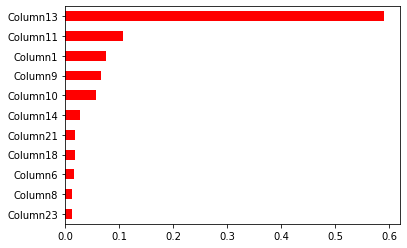

In [63]:
#create a graph
%matplotlib inline

rfc_cof.sort_values().plot.barh(color= 'red');

In [64]:
#get precision, recall, fiscore 

from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.29      0.40      9952
           1       0.54      0.81      0.65      9996

    accuracy                           0.55     19948
   macro avg       0.57      0.55      0.52     19948
weighted avg       0.57      0.55      0.52     19948



In [100]:
from sklearn.metrics import confusion_matrix

In [102]:
#Get the confusion matrix
#matrix = confusion_matrix(y_train, y_pred)
#print(matrix)


In [76]:
#import seaborn as sns
#sns.heatmap(cf_matrix, annot=True)


In [77]:
#sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')

In [78]:
#labels = ['True Neg','False Pos','False Neg','True Pos']
#labels = np.asarray(labels).reshape(2,2)
#sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [117]:
#group_names = ['True Neg','False Pos','False Neg','True Pos']
#group_counts = ["{0:0.0f}".format(value) for value in
                #cf_matrix.flatten()]
#group_percentages = ["{0:.2%}".format(value) for value in
                     #cf_matrix.flatten()/np.sum(cf_matrix)]
#labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
#labels = np.asarray(labels).reshape(2,2)
#sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [118]:
# actual 9965
# model 10805


In [48]:
new=pd.read_excel("C:\\Users\\PS\\Dropbox\\PC\\Downloads\\2019.xlsx")
y_test1 = new['RESULT']
new.drop(['RESULT'],axis=1,inplace=True)
new.info()
x_test1 = new

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14559 entries, 0 to 14558
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column1   14559 non-null  int64  
 1   Column6   14559 non-null  int64  
 2   Column8   14559 non-null  object 
 3   Column9   14559 non-null  int64  
 4   Column10  14559 non-null  int64  
 5   Column11  14559 non-null  int64  
 6   Column13  14559 non-null  float64
 7   Column14  14559 non-null  object 
 8   Column18  14559 non-null  object 
 9   Column21  14559 non-null  object 
 10  Column23  14559 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 1.2+ MB


In [49]:
print(train.isnull().sum())


Column1     0
Column6     0
Column8     0
Column9     0
Column10    0
Column11    0
Column13    0
Column14    0
Column18    0
Column21    0
Column23    0
RESULT      0
dtype: int64


In [71]:
xtest1.shape()

NameError: name 'xtest1' is not defined

In [50]:
x_test1.replace({'Column1':{'R':0,'B':1,'C':2,'T':3}},inplace=True)
x_test1.replace({'Column8':{'P':0,'I':1,'S':2}},inplace=True)
x_test1.replace({'Column14':{'B':0,'C':1,'R':2}},inplace=True)
x_test1.replace({'Column18':{'CO':0,'PU':1,'MH':2,'SF':3,'CP':4}},inplace=True)
x_test1.replace({'Column21':{'P':0,'C':1,'N':2,'R':3}},inplace=True)

In [51]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Column1','Column6','Column8','Column9','Column10','Column11','Column13','Column14','Column18','Column21','Column23']
le = LabelEncoder()
for i in var_mod:
    x_test1[i] = le.fit_transform(x_test1[i])
x_test1.dtypes

Column1     int64
Column6     int64
Column8     int64
Column9     int64
Column10    int64
Column11    int64
Column13    int64
Column14    int64
Column18    int64
Column21    int64
Column23    int64
dtype: object

In [52]:
#instantiate the classifier
rfc = RandomForestClassifier(random_state=42)

In [53]:
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
y_pred1 = rfc.predict(x_test1)

In [73]:
predict_train_data = rfc.predict(x_test1)
print("ACCURACY = {0:.3f}".format(metrics.accuracy_score(y_test1, predict_train_data)))

ACCURACY = 0.825


In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
#visualize the feature importances by alligning important feature and columns 
importance = rfc.feature_importances_
columns = x_train.columns

In [76]:
rfc_cof = pd.Series(importance, columns)
rfc_cof

Column1     0.075653
Column6     0.015672
Column8     0.012364
Column9     0.067210
Column10    0.056841
Column11    0.106558
Column13    0.590029
Column14    0.026729
Column18    0.018067
Column21    0.018772
Column23    0.012105
dtype: float64

In [77]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75      4594
           1       0.91      0.82      0.87      9965

    accuracy                           0.83     14559
   macro avg       0.80      0.83      0.81     14559
weighted avg       0.84      0.83      0.83     14559



       Actual  Predicted
0           1          1
1           1          1
2           1          1
3           1          1
4           1          1
...       ...        ...
14554       0          0
14555       0          0
14556       0          0
14557       0          0
14558       0          0

[14559 rows x 2 columns]


AttributeError: module 'seaborn' has no attribute 'show'

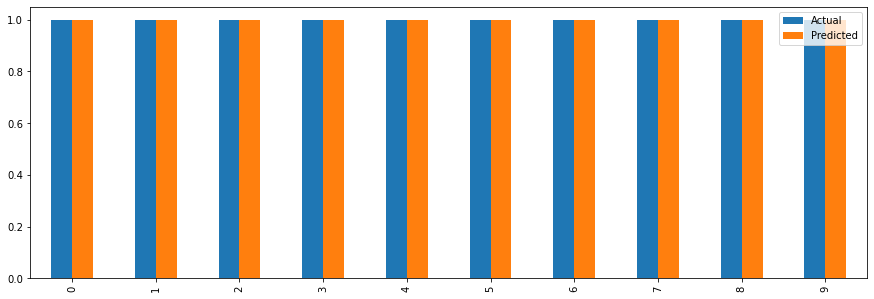

In [110]:
rf_compare = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
print(rf_compare)
(rf_compare.head(10)).plot(kind='bar', figsize=(15,5))
plt.show()

In [109]:
y_pred1

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

       Actual  Predicted
0           1          1
1           1          1
2           1          1
3           1          1
4           1          1
...       ...        ...
19943       0          1
19944       0          1
19945       0          1
19946       0          0
19947       0          1

[19948 rows x 2 columns]


AttributeError: module 'seaborn' has no attribute 'show'

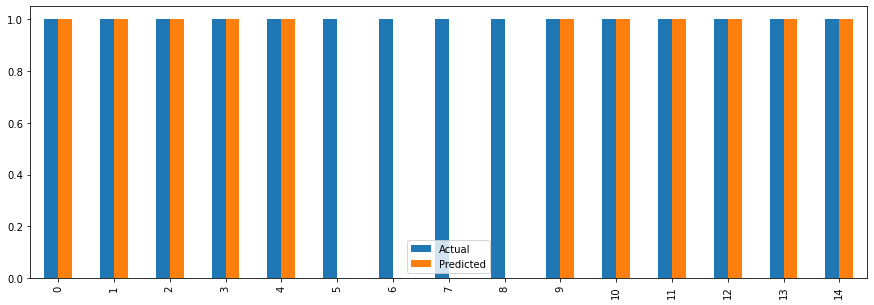

In [111]:
rf_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(rf_compare)
(rf_compare.head(15)).plot(kind='bar', figsize=(15,5))
plt.show()